# グラフの文字で英語以外を使えるようにする

In [10]:
!pip install japanize-matplotlib

# 関数 save_fig：図の保存

In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import japanize_matplotlib

def save_fig(plt, file_prefix, bbox_inches='tight'):
    if file_prefix == '':
        return

    parent = os.path.dirname(os.path.abspath(file_prefix))
    os.makedirs(parent, exist_ok=True)
    plt.savefig(f'{file_prefix}.pdf', transparent=True, bbox_inches=bbox_inches, pad_inches = 0)
    plt.savefig(f'{file_prefix}.png', transparent=True, dpi=300, bbox_inches=bbox_inches, pad_inches = 0)

# 実習2.1：データセットの読み込み

In [12]:
import pandas as pd

# ボストン住宅価格データセットをファイルdm2.csvから、変数bostonへ読み込む
boston = pd.read_csv('dm2.csv')

# データフレームの中身を表示
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


# 実習2.2：犯罪率と住宅価格の関係を分析する

In [13]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 説明変数。データフレームから名前CRIMの列を取り出し、変数xに代入
x = boston['CRIM']
# 分析用に、配列を(データ数, 成分数)の形状に変形
x = x.to_numpy().reshape(-1, 1)

# 目的変数。データフレームから名前PRICEの列を取り出し、変数y_trueに代入
y_true = boston['PRICE']
# 分析用に、配列を(データ数, 成分数)の形状に変形
y_true = y_true.to_numpy().reshape(-1, 1)

# 単回帰分析クラスのインスタンス生成
model1=LinearRegression()

# 回帰の実行。パラメータ推定。説明変数x、目的変数y_true
model1.fit(x, y_true)

w1=model1.coef_      # model1が持つ傾きの値をw1に代入
w0=model1.intercept_ # model1が持つ切片の値をw0に代入
print('w1(傾き):', w1)
print('w1の形状:', w1.shape)
print('w0(切片):', w0)
print('w0の形状:', w0.shape)

# 説明変数に対する予測値を計算
y_pred = model1.predict(x)

# 目的変数に対する予測値の
# 平均二乗誤差(mean squared error)を計算する
mse=mean_squared_error(y_true, y_pred)
print('MSE:', mse)

w1(傾き): [[-0.41519028]]
w1の形状: (1, 1)
w0(切片): [24.03310617]
w0の形状: (1,)
MSE: 71.69073588196659


# 実習2.3：犯罪率と住宅価格の関係、回帰直線を描画する

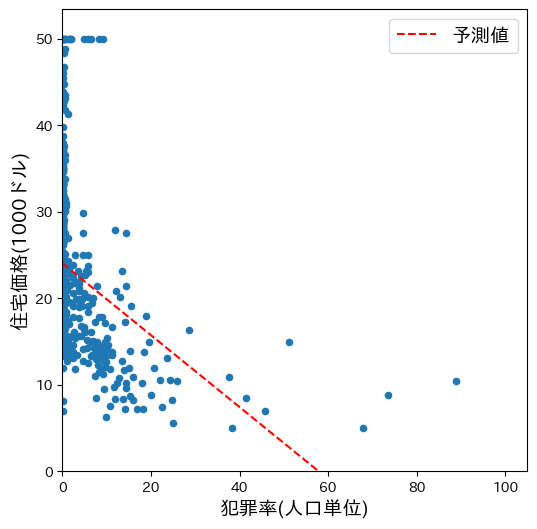

In [14]:
import matplotlib.pyplot as plt
import japanize_matplotlib
import numpy as np

# 回帰直線を引くために説明変数の値を生成
# 0以上100以下の範囲で等間隔に100点生成する。
x2=np.linspace(0, 100, 1000)

# 配列を(データ数, 成分数)の形状に変形
x2=x2.reshape(-1, 1)

# 目的変数の値を計算
y_pred=model1.predict(x2)

# 図のサイズを指定
plt.figure(figsize=(6, 6))

# 横軸の値に説明変数、縦軸に目的変数を指定し、
# サイズ200のマーカーで散布図を作成
plt.scatter(x, y_true, s=20)

# 回帰直線を描画する
# 横軸の値x2、縦軸の値y、線の種類は破線、線の名前は予測値、線の色は赤
plt.plot(x2, y_pred, linestyle='dashed', label='予測値', color='red')

plt.xlabel('犯罪率(人口単位)', fontsize=14)
plt.ylabel('住宅価格(1000ドル)', fontsize=14)
plt.xlim(0, )
plt.ylim(0, )
plt.legend(fontsize=14)
plt.show()

# 実習2.4：部屋数と住宅価格の関係を分析する

In [15]:
import numpy as np
from sklearn.linear_model import LinearRegression

# 説明変数。データフレームから名前RMの列を取り出し、変数xに代入
x = boston['RM']
# 分析用に、配列を(データ数, 成分数)の形状に変形
x = x.to_numpy().reshape(-1, 1)

# 目的変数。データフレームから名前PRICEの列を取り出し、変数y_trueに代入
y_true = boston['PRICE']
# 分析用に、配列を(データ数, 成分数)の形状に変形
y_true = y_true.to_numpy().reshape(-1, 1)

# 単回帰分析クラスのインスタンス生成
model2=LinearRegression()

# 回帰の実行。パラメータ推定。説明変数x、目的変数y_true
model2.fit(x, y_true)

w1=model2.coef_      # model2が持つ傾きの値をw1に代入
w0=model2.intercept_ # model2が持つ切片の値をw0に代入
print('w1(傾き):', w1)
print('w1の形状:', w1.shape)
print('w0(切片):', w0)
print('w0の形状:', w0.shape)

# 説明変数に対する予測値を計算
y_pred = model2.predict(x)

# 目的変数に対する予測値の
# 平均二乗誤差(mean squared error)を計算する
mse=mean_squared_error(y_true, y_pred)
print('MSE:', mse)

w1(傾き): [[9.10210898]]
w1の形状: (1, 1)
w0(切片): [-34.67062078]
w0の形状: (1,)
MSE: 43.60055177116956


# 実習2.5：部屋数と住宅価格の関係、回帰直線を描画する

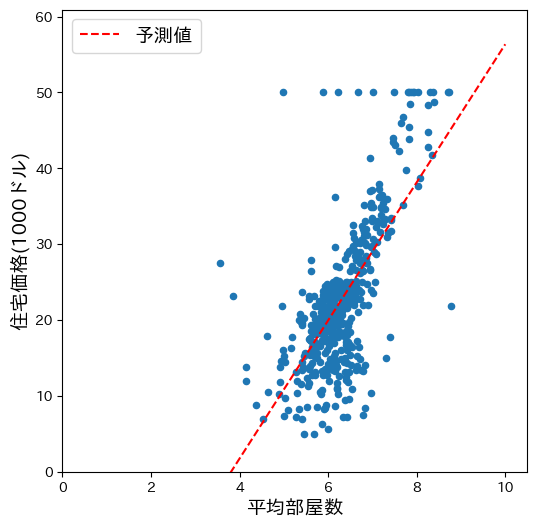

In [16]:
import matplotlib.pyplot as plt
import japanize_matplotlib
import numpy as np

# 回帰直線を引くために説明変数の値を生成
# 0以上10以下の範囲で等間隔に100点生成する。
x2=np.linspace(0, 10, 100)

# 配列を(データ数, 成分数)の形状に変形
x2=x2.reshape(-1, 1)

# 目的変数の値を計算
y_pred=model2.predict(x2)

# 図のサイズを指定
plt.figure(figsize=(6, 6))

# 横軸の値に説明変数、縦軸に目的変数を指定し、
# サイズ200のマーカーで散布図を作成
plt.scatter(x, y_true, s=20)

# 回帰直線を描画する
# 横軸の値x2、縦軸の値y、線の種類は破線、線の名前は予測値、線の色は赤
plt.plot(x2, y_pred, linestyle='dashed', label='予測値', color='red')

plt.xlabel('平均部屋数', fontsize=14)
plt.ylabel('住宅価格(1000ドル)', fontsize=14)
plt.xlim(0, )
plt.ylim(0, )
plt.legend(fontsize=14)
plt.show()

# 実習2.6：築年数と住宅価格の関係を分析する

In [19]:
import numpy as np
from sklearn.linear_model import LinearRegression

# 説明変数。データフレームから名前AGEの列を取り出し、変数xに代入
x = boston['AGE']
# 分析用に、配列を(データ数, 成分数)の形状に変形
x = x.to_numpy().reshape(-1, 1)

# 目的変数。データフレームから名前PRICEの列を取り出し、変数y_trueに代入
y_true = boston['PRICE']
# 分析用に、配列を(データ数, 成分数)の形状に変形
y_true = y_true.to_numpy().reshape(-1, 1)

# 単回帰分析クラスのインスタンス生成
model3=LinearRegression()

# 回帰の実行。パラメータ推定。説明変数x、目的変数y_true
model3.fit(x, y_true)

w1=model3.coef_      # model3が持つ傾きの値をw1に代入
w0=model3.intercept_ # model3が持つ切片の値をw0に代入
print('w1(傾き):', w1)
print('w1の形状:', w1.shape)
print('w0(切片):', w0)
print('w0の形状:', w0.shape)

# 説明変数に対する予測値を計算
y_pred = model3.predict(x)

# 目的変数に対する予測値の
# 平均二乗誤差(mean squared error)を計算する
mse=mean_squared_error(y_true, y_pred)
print('MSE:', mse)

w1(傾き): [[-0.12316272]]
w1の形状: (1, 1)
w0(切片): [30.97867776]
w0の形状: (1,)
MSE: 72.42398092899337


# 実習2.7：築年数と住宅価格の関係、回帰直線を描画する

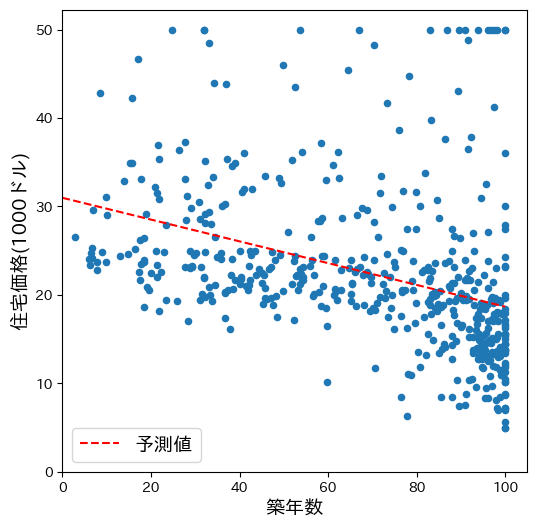

In [20]:
import matplotlib.pyplot as plt
import japanize_matplotlib
import numpy as np

# 回帰直線を引くために説明変数の値を生成
# 0以上100以下の範囲で等間隔に100点生成する。
x2=np.linspace(0, 100, 100)

# 配列を(データ数, 成分数)の形状に変形
x2=x2.reshape(-1, 1)

# 目的変数の値を計算
y_pred=model3.predict(x2)

# 図のサイズを指定
plt.figure(figsize=(6, 6))

# 横軸の値に説明変数、縦軸に目的変数を指定し、
# サイズ200のマーカーで散布図を作成
plt.scatter(x, y_true, s=20)

# 回帰直線を描画する
# 横軸の値x2、縦軸の値y、線の種類は破線、線の名前は予測値、線の色は赤
plt.plot(x2, y_pred, linestyle='dashed', label='予測値', color='red')

plt.xlabel('築年数', fontsize=14)
plt.ylabel('住宅価格(1000ドル)', fontsize=14)
plt.xlim(0, )
plt.ylim(0, )
plt.legend(fontsize=14)
plt.show()